# Content

>[Content](#scrollTo=rxRNjWw6SXrQ)

>[Task](#scrollTo=bME6YnsGS5DI)

>[Additional links](#scrollTo=Lkb0fQgC3XZQ)

>[Libraries and Functions](#scrollTo=fuzizqNKmVH-)

>>[Additional libraries](#scrollTo=va0W5HEOmYsF)

>>[Additional fuctions](#scrollTo=TOB_rU9XmdJu)

>>>[For using NLTK](#scrollTo=6GDTDBkh-dCg)

>>>[For using natasha](#scrollTo=zNl4flmk-6g9)

>>>[My functions](#scrollTo=S5BP1vyV_A2p)

>[About data](#scrollTo=8KPioMVtmmUs)

>>[Load Data](#scrollTo=_OcxdHkwmjF5)

>>>[Load unprocessed data](#scrollTo=sHMxgHzv5cS-)

>>>[Load clean data](#scrollTo=x5FJ9sgs5Pa2)

>>[Review data](#scrollTo=O1fW1h9cmsKG)

>[Natasha](#scrollTo=LD69XeBp1PUx)

>>[Preprocessing data](#scrollTo=3aHTJ_UpvkO6)

>>[Find the best taggers (Natasha)](#scrollTo=ny7eZfZ_XZmd)

>>[Combining tagger](#scrollTo=I_nehhmW0EqM)

>>[Comparison grams](#scrollTo=W2R8Rr_M2yom)

>[NLTK](#scrollTo=P6sebCdNTKl1)

>>[Preprocessing data](#scrollTo=mjhAdL4fbKhV)

>>[Find the best taggers (NLTK)](#scrollTo=kpiVgV3bb0PG)

>>[Comparison grams](#scrollTo=W-HShIUmdwkL)

>[Spacy](#scrollTo=SIEjQF1eYmV3)

>>[Preprocessing data](#scrollTo=QKhSjewGZAUS)

>>[Find the best taggers (Spacy)](#scrollTo=DN6Ol0ovZO1Y)

>>[Comparison grams](#scrollTo=7xM7cdxzZVLC)

>[NN](#scrollTo=7k-VaTRmT9Lr)

>>[Load data](#scrollTo=HHSFCcXntslS)

>>[Preprocessing data](#scrollTo=VmDOsJhmdsE-)

>>[Split data](#scrollTo=d70VT9G9pVwM)

>>[Create DataLoader](#scrollTo=Qcui75ixTOhV)

>>[Make model](#scrollTo=jT8f6MmJasI-)

>>[Model params](#scrollTo=QNRz4mxTLRk5)

>>[Review model](#scrollTo=-eKQd_8fLUjB)

>>[Optimizer and Loss](#scrollTo=ab9ioGAeLYJj)

>>[Learning model](#scrollTo=r3Dnz7cGLdHK)

>>[Save model](#scrollTo=aTMQkME-m9hm)

>[Conclusion](#scrollTo=huD79mKjv0b_)



# Task

«POS-tagger и NER»

1. Задание
* Написать теггер на данных с русским языком
проверить UnigramTagger, BigramTagger, TrigramTagger и их комбинации
* Написать свой теггер как на занятии, попробовать разные векторайзеры, добавить знание не только букв но и слов
* Сравнить все реализованные методы, сделать выводы  
2. Задание
* Проверить, насколько хорошо работает NER
Данные брать из Index of http://www.labinform.ru/pub/named_entities/
проверить NER из nltk/spacy/deeppavlov.
* Написать свой NER, попробовать разные подходы.
передаём в сетку токен и его соседей.
передаём в сетку только токен.
свой вариант.
* Сравнить свои реализованные подходы на качество — вывести precision/recall/f1_score.


# Additional links

* NLTK Tagers [Unigram](https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_unigram_tagger.htm), [Bigram, Trigram](https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_combining_taggers.htm)
* Natasha [github](https://github.com/natasha/natasha), [habr](https://habr.com/ru/articles/516098/)
* Regular expressions [one](https://habr.com/ru/articles/349860/) [two](https://tproger.ru/translations/regular-expression-python) [three](https://docs.python.org/3/library/re.html#)

# Libraries and Functions

## Additional libraries

In [ ]:
!pip install pymorphy2 clean-text natasha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 615.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 29.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=ef41c15d977bf046d57144d781034130cfe2bde5e2efc7ce42a4aef37400b466
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=034338728833356e7dde9af8f09ad2762045424c56186889

In [ ]:
# !python -m spacy download ru_core_news_sm

In [ ]:
import time
import nltk
from nltk.corpus import brown, stopwords, names
from nltk.tag import UnigramTagger, BigramTagger, TrigramTagger, DefaultTagger, SequentialBackoffTagger
from google.colab import drive, files
import os
import shutil
import re
import pandas as pd
from tqdm import tqdm
from pymorphy2 import MorphAnalyzer
from cleantext import clean
import numpy as np
from sklearn.feature_extraction import text as for_stop_word
from sklearn.base import BaseEstimator, TransformerMixin
import emoji
import pickle
from sklearn.model_selection import train_test_split
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,

    PER,
    LOC,
    ORG,
    NamesExtractor,
    DatesExtractor,
    MoneyExtractor,
    AddrExtractor,

    Doc
)
import seaborn as sns
import spacy

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Additional fuctions

### For using NLTK

In [ ]:
nltk.download('stopwords')
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_ru')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('names')
nltk.download('tagsets')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.
[n

True

### For using natasha

In [ ]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)
dates_extractor = DatesExtractor(morph_vocab)
money_extractor = MoneyExtractor(morph_vocab)
addr_extractor = AddrExtractor(morph_vocab)

### My functions

In [ ]:
def MDir(dir_name):
    """Make a new folder"""
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)

def Upload(dir_name):
    f = files.upload()
    for fl in list(f.keys()):
        shutil.move('/content/' + fl, dir_name + fl)


class CleanText(BaseEstimator, TransformerMixin):

    """Cleaning text from regular characters in column
    key: str - name of column
    stp_wrd: str - english, russian, ...
    like_list: bool - True|False
        If True then return text as list [word, word, ..., word], False return str,
        default False
    You shoul to import:
        >>> pip install pymorphy2
        >>> pip install clean-text
        import re
        import pandas as pd
        from tqdm import tqdm
        from pymorphy2 import MorphAnalyzer
        from sklearn.base import BaseEstimator, TransformerMixin
        from cleantext import clean
        from nltk.corpus import stopwords
        nltk.download('stopwords')"""

    def __init__(self, key, stp_wrd : str, like_list: bool = False):
        self.key = key
        self.stp_wrd = stp_wrd
        self.sw = stopwords.words(self.stp_wrd)
        self.morpher = MorphAnalyzer()
        self.like_list = like_list


    def clean_text(self, text:str) -> str:

        """Clean text"""

        if not isinstance(text, str):
            text = str(text)

        text = text.lower()
        text = text.strip('\n').strip('\r').strip('\t')
        if self.stp_wrd == 'russian':
            text = re.sub(r'https?://\S+|www\.\S+', "электронныйадресс", text)
        else:
            text = re.sub(r'https?://\S+|www\.\S+', "weblinks", text)

        text = re.sub("\s\r\n\|-\s\r\n|\r\n", '', str(text))
        text = re.sub("[0-9]|[-—.,:;_%©«»?*!@#№$^•·&()]|[+=]|[[]|[]]|[/]|", '', text)
        text = re.sub("\s\w\s", " ", text)
        text = re.sub(r"\r\n\t|\n|\\s|\r\t|\\n", ' ', text)
        text = re.sub(r'[\xad]|[\s+]', ' ', text.strip())
        text = re.sub('\n', ' ', text)
        if self.stp_wrd != 'russian':
            text = clean(text, no_emoji=True)
        else:
            pass
        text = [self.morpher.parse(word)[0].normal_form for word in text.split() if word not in self.sw]
        if self.like_list:
            return text
        else:
            text = " ".join(text)
            return text


    def get_feature_names_out(self, feature_names_out=None):
        if feature_names_out != None:
            return feature_names_out
        else:
            return [self.key]

    def fit(self, X, y=None):
        return self

    def transform(self, X) -> pd.DataFrame:
        tqdm.pandas()
        X[self.key] = X[self.key].progress_apply(lambda x: CleanText.clean_text(self, x))
        return X[self.key]


def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff


def model_tagger(mtager, X, y, y_sent, backoff=None):
    tagger = mtager(X, backoff=backoff)
    return tagger, tagger.evaluate(y), tagger.tag(test_sent)


def Find_best_tagger(tagger_list: list, train_data, test_data, test_sent):
    tagger_dict = {}
    for t in range(len(tagger_list)):
        if t <= 2:
            tagger, acc, context = model_tagger(tagger_list[t], train_data, test_data, test_sent)
            tagger_dict[f"{tagger_list[t].mro()[0].__name__}"] = tagger
            tagger_dict[f"acc_{tagger_list[t].mro()[0].__name__}"] = acc
            tagger_dict[f"context_{tagger_list[t].mro()[0].__name__}"] = context
        else:
            tagger, acc, context = model_tagger(tagger_list[t][0],
                                                    train_data,
                                                    test_data,
                                                    test_sent,
                                                    backoff=tagger_dict[tagger_list[t][1].mro()[0].__name__])
            tagger_dict[f"{tagger_list[t][0].mro()[0].__name__}_{tagger_list[t][1].mro()[0].__name__}"] = tagger
            tagger_dict[f"acc_{tagger_list[t][0].mro()[0].__name__}_{tagger_list[t][1].mro()[0].__name__}"] = acc
            tagger_dict[f"context_{tagger_list[t][0].mro()[0].__name__}_{tagger_list[t][1].mro()[0].__name__}"] = context
    return tagger_dict


class MyText(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).long()
        self.target = torch.from_numpy(target).long()
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.data)


def my_own_layer(DF: pd.Series) -> torch.tensor:
    texts = DF.to_list()
    tfidf_vectorizer = TfidfVectorizer()
    tfidf = tfidf_vectorizer.fit_transform(texts)
    df_vocab = tfidf_vectorizer.vocabulary_
    lookup_tensor = torch.tensor(list(df_vocab.values()), dtype=torch.long)
    return lookup_tensor


class Model_Text(nn.Module):
    def __init__(self, vocab_size, embedding_out, out_channel, size_kernel):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_out)
        self.mpool1 = nn.MaxPool1d(kernel_size=size_kernel)
        pool_out = embedding_out // self.mpool1.kernel_size
        self.fc1 = nn.Linear(pool_out, pool_out // 2)
        self.fc2 = nn.Linear(pool_out // 2, pool_out // 4)
        self.fc3 = nn.Linear(pool_out // 4, pool_out // 8)
        self.fc4 = nn.Linear(pool_out // 8, out_channel)

    def forward(self, x):
        out_e = self.embedding(x)
        pool = self.mpool1(out_e)
        out = self.fc1(pool)
        r = F.relu(out)
        out = self.fc2(r)
        r = F.relu(out)
        out = self.fc3(r)
        r = F.relu(out)
        out = self.fc4(r)
        outputs = F.softmax(out)
        return outputs


def Model_fit(Model, X, y, model_epochs, model_optimizers, model_losses, logit_step, device):
    Model.train()
    start = time.time()
    train_accuracy_all = []
    train_loss_all = []


    for epoch in range(model_epochs):
        running_loss, running_items, running_right = 0.0, 0.0, 0.0
        for i, data in enumerate(X, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            # обнуляем градиент
            model_optimizers.zero_grad()

            outputs = Model(inputs)
            loss = model_losses(outputs, labels)
            loss.backward()
            model_optimizers.step()

            # выводим статистику о процессе обучения
            running_loss += loss.item()
            running_items += len(labels)
            running_right += (labels == torch.max(outputs, 1)[1]).sum()

            # выводим статистику о процессе обучения
            if i % logit_step == 0:    # печатаем каждые 300 mini-batches
                Model.eval()

                print("", end=f'\rEpoch [{epoch + 1}/{model_epochs}]. ' \
                                f'Loss: {running_loss / running_items:.5f}. ' \
                                f'Acc: {running_right / running_items:.5f}. ')

                train_accuracy_all.append(running_right / running_items)
                train_loss_all.append(running_loss / running_items)

                running_loss, running_items, running_right = 0.0, 0.0, 0.0

                test_running_right, test_running_total = 0.0, 0.0
                for i, data in enumerate(y):

                    test_outputs = Model(data[0].to(device))
                    test_running_total += len(data[1])
                    test_running_right += (data[1].to(device) == torch.max(test_outputs, 1)[1]).sum()

                print("", end=f'Test acc: {test_running_right / test_running_total:.5f}')

            Model.train()

    stop = time.time()
    print(f'\nTraining is finished! It took {round((stop - start), 2)} seconds')
    plt.plot(train_loss_all)
    plt.show()
    return train_accuracy_all, train_loss_all

In [ ]:
path_to_work_dir = "/content/drive/MyDrive/NLP_HW5/"

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# MDir(path_to_work_dir)

# About data

## Load Data

In [ ]:
# path_old = path_to_work_dir.replace('HW5', 'HW4')

In [ ]:
# shutil.move(path_old + 'RPN_parser.csv', path_to_work_dir + 'RPN_parser.csv')
# os.listdir(path_to_work_dir)

['RPN_parser.csv', 'clean_rpn_parser.csv', 'words_tag_csv']

### Load unprocessed data

In [ ]:
# df = pd.read_csv(path_to_work_dir + 'RPN_parser.csv')

In [ ]:
# cln = CleanText('RPN_questions', 'russian')
# df['RPN_questions'] = cln.transform(df)

In [ ]:
# df.to_csv(path_to_work_dir + "clean_rpn_parser.csv", index=None)

### Load clean data

In [ ]:
df = pd.read_csv(path_to_work_dir + "clean_rpn_parser.csv")

## Review data

In [ ]:
df.head(5)

,doc_id,RPN_questions,RPN_answers
0,44224,здравствуйте заказать сайт техмый швейный обор...,ДОбрый день! Вам необходимо указать место нахо...
1,44219,здравствуйте проживать адрес москва ул базовск...,Добрый день! Управление Роспотребнадзора по Мо...
2,44214,здравствуйте наш квартиройрасположенный адрес ...,Уважаемая Анна! Раздел «Виртуальная приёмная» ...
3,44211,купить вайлдберриз цветочный композиция сразу ...,Добрый день! В связи с возросшим числом коммен...
4,44210,добрый денья маркетплейс увиделчтый цена телеф...,Добрый день! Вам необходимо направить обращени...


# Natasha

## Preprocessing data

Create a tag corpus

In [ ]:
chunk_corpus = []
for text in tqdm(df['RPN_questions']):
    sent_list = []
    doc = Doc(text)
    doc.segment(segmenter)
    doc.tag_morph(morph_tagger)
    doc.tag_ner(ner_tagger)
    sent = doc.tokens
    for s in sent:
        sent_list.append((s.text, s.pos))
    chunk_corpus.append(sent_list)

100%|██████████| 19993/19993 [07:19<00:00, 45.50it/s]


Split data

In [ ]:
train_data, test_data = train_test_split(chunk_corpus, test_size=0.1, random_state=42)
len(train_data), len(test_data)

(17993, 2000)

In [ ]:
train_data, test_sents = train_test_split(train_data, test_size=0.1, random_state=42)
len(train_data), len(test_sents)

(16193, 1800)

In [ ]:
test_sent = []
for sen in test_sents:
    for s in sen:
        test_sent.append(s[0])

## Find the best taggers (Natasha)

In [ ]:
tagger_lists = [UnigramTagger,
                BigramTagger,
                TrigramTagger,
                [BigramTagger, UnigramTagger],
                [TrigramTagger, UnigramTagger],
                [TrigramTagger, BigramTagger]]

In [ ]:
td = Find_best_tagger(tagger_lists, train_data, test_data, test_sent)

<ipython-input-5-39dd93b506a2>:96: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  return tagger, tagger.evaluate(y), tagger.tag(test_sent)


In [ ]:
td.keys()

dict_keys(['UnigramTagger', 'acc_UnigramTagger', 'context_UnigramTagger', 'BigramTagger', 'acc_BigramTagger', 'context_BigramTagger', 'TrigramTagger', 'acc_TrigramTagger', 'context_TrigramTagger', 'BigramTagger_UnigramTagger', 'acc_BigramTagger_UnigramTagger', 'context_BigramTagger_UnigramTagger', 'TrigramTagger_UnigramTagger', 'acc_TrigramTagger_UnigramTagger', 'context_TrigramTagger_UnigramTagger', 'TrigramTagger_BigramTagger', 'acc_TrigramTagger_BigramTagger', 'context_TrigramTagger_BigramTagger'])

## Combining tagger

In [ ]:
backoff = DefaultTagger('NN')
combigram = backoff_tagger(train_data,
                     [UnigramTagger, BigramTagger, TrigramTagger],
                     backoff = backoff)

acc_combi = combigram.evaluate(test_data)
combi_context = combigram.tag(test_sent)

<ipython-input-38-b021f8a14c74>:6: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  acc_combi = combigram.evaluate(test_data)


In [ ]:
acc_combi, combi_context[:10]

(0.8849583760976166,
 [('добрый', 'ADJ'),
  ('день', 'NOUN'),
  ('адрес', 'NOUN'),
  ('пушкино', 'NOUN'),
  ('ул', 'NOUN'),
  ('маяковский', 'VERB'),
  ('кв', 'ADJ'),
  ('второй', 'ADJ'),
  ('неделя', 'NOUN'),
  ('кран', 'NOUN')])

In [ ]:
td["Combining_tager"] = combigram
td["acc_Combining_tager"] = acc_combi
td["context_Combining_tager"] = combi_context

## Comparison grams

In [ ]:
td_1 = {}
for k, v in td.items():
    if "context" in k:
        td_1[k] = [v]
    else:
        td_1[k] = v

In [ ]:
df_taggers = pd.DataFrame(td_1)
df_taggers

,UnigramTagger,acc_UnigramTagger,context_UnigramTagger,BigramTagger,acc_BigramTagger,context_BigramTagger,TrigramTagger,acc_TrigramTagger,context_TrigramTagger,BigramTagger_UnigramTagger,...,context_BigramTagger_UnigramTagger,TrigramTagger_UnigramTagger,acc_TrigramTagger_UnigramTagger,context_TrigramTagger_UnigramTagger,TrigramTagger_BigramTagger,acc_TrigramTagger_BigramTagger,context_TrigramTagger_BigramTagger,Combining_tager,acc_Combining_tager,context_Combining_tager
0,<UnigramTagger: size=63217>,0.886357,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<BigramTagger: size=111138>,0.229924,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<TrigramTagger: size=196372>,0.135196,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<BigramTagger: size=17870>,...,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<TrigramTagger: size=27445>,0.885643,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<TrigramTagger: size=21590>,0.228502,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<TrigramTagger: size=21590>,0.884958,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (..."


In [ ]:
df_taggers.to_csv(path_to_work_dir + "Comparison_grams.csv", index=None)

In [ ]:
df_taggers = pd.read_csv(path_to_work_dir + "Comparison_grams.csv")

In [ ]:
df_taggers.filter(regex="acc_").T.sort_values(by=0, ascending=False)

,0
acc_UnigramTagger,0.886357
acc_BigramTagger_UnigramTagger,0.886296
acc_TrigramTagger_UnigramTagger,0.885643
acc_Combining_tager,0.884958
acc_BigramTagger,0.229924
acc_TrigramTagger_BigramTagger,0.228502
acc_TrigramTagger,0.135196


In [ ]:
class NamesTagger(SequentialBackoffTagger):
    def __init__(self, *args, **kwargs):
        SequentialBackoffTagger.__init__(self, *args, **kwargs)
        self.name_set = set([n.lower() for n in names.words()])

    def choose_tag(self, tokens, index, history):
        word = tokens[index]
        if word.lower() in self.name_set:
             return 'PER'
        else:
             return None


In [ ]:
nt = NamesTagger()
print(nt.tag(['Katya','Adam','Window']))

[('Katya', 'PER'), ('Adam', 'PER'), ('Window', None)]


# NLTK

## Preprocessing data

Create a tag corpus

In [ ]:
corpus = []
for sent in df['RPN_questions']:
    corpus.append(nltk.pos_tag(sent.split(" "), lang='rus'))

In [ ]:
df_nltk_token = pd.DataFrame({'doc_id': df['doc_id'], 'Tokens': corpus})
df_nltk_token.head(4)

,doc_id,Tokens
0,44224,"[(здравствуйте, V), (заказать, V), (сайт, S), ..."
1,44219,"[(здравствуйте, V), (проживать, V), (адрес, S)..."
2,44214,"[(здравствуйте, V), (наш, A-PRO=m), (квартирой..."
3,44211,"[(купить, V), (вайлдберриз, S), (цветочный, A=..."


In [ ]:
df_nltk_token.to_csv(path_to_work_dir + "nltk_tokens.csv", index=None)

In [ ]:
df_nltk_token = pd.read_csv(path_to_work_dir + "nltk_tokens.csv")
df_nltk_token.head(4)

,doc_id,Tokens
0,44224,"[('здравствуйте', 'V'), ('заказать', 'V'), ('с..."
1,44219,"[('здравствуйте', 'V'), ('проживать', 'V'), ('..."
2,44214,"[('здравствуйте', 'V'), ('наш', 'A-PRO=m'), ('..."
3,44211,"[('купить', 'V'), ('вайлдберриз', 'S'), ('цвет..."


Split data

In [ ]:
words = []
tags = []
for text in corpus:
    for t in text:
        words.append(t[0])
        tags.append(t[1])

In [ ]:
df_words = pd.DataFrame({'word': words, 'tag': tags})
df_words.head(5)

,word,tag
0,здравствуйте,V
1,заказать,V
2,сайт,S
3,техмый,A=m
4,швейный,A=m


In [ ]:
train_data, test_data = train_test_split(corpus, test_size=0.1, random_state=42)
len(train_data), len(test_data)

(17993, 2000)

In [ ]:
train_data, test_sents = train_test_split(train_data, test_size=0.1, random_state=42)
len(train_data), len(test_sents)

(16193, 1800)

In [ ]:
test_sent = []
for sen in test_sents:
    for s in sen:
        test_sent.append(s[0])

## Find the best taggers (NLTK)

In [ ]:
tagger_lists = [UnigramTagger,
                BigramTagger,
                TrigramTagger,
                [BigramTagger, UnigramTagger],
                [TrigramTagger, UnigramTagger],
                [TrigramTagger, BigramTagger]]

In [ ]:
td_nltk = Find_best_tagger(tagger_lists, train_data, test_data, test_sent)

<ipython-input-23-39dd93b506a2>:96: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  return tagger, tagger.evaluate(y), tagger.tag(test_sent)


## Comparison grams

In [ ]:
td_nltk_1 = {}
for k, v in td_nltk.items():
    if "context" in k:
        td_nltk_1[k] = [v]
    else:
        td_nltk_1[k] = v

In [ ]:
df_taggers_nltk = pd.DataFrame(td_nltk_1)
df_taggers_nltk

,UnigramTagger,acc_UnigramTagger,context_UnigramTagger,BigramTagger,acc_BigramTagger,context_BigramTagger,TrigramTagger,acc_TrigramTagger,context_TrigramTagger,BigramTagger_UnigramTagger,acc_BigramTagger_UnigramTagger,context_BigramTagger_UnigramTagger,TrigramTagger_UnigramTagger,acc_TrigramTagger_UnigramTagger,context_TrigramTagger_UnigramTagger,TrigramTagger_BigramTagger,acc_TrigramTagger_BigramTagger,context_TrigramTagger_BigramTagger
0,<UnigramTagger: size=66530>,0.92022,"[(добрый, A=m), (день, S), (адрес, S), (пушкин...",<BigramTagger: size=117281>,0.236316,"[(добрый, A=m), (день, S), (адрес, S), (пушкин...",<TrigramTagger: size=207891>,0.148057,"[(добрый, A=m), (день, S), (адрес, S), (пушкин...",<BigramTagger: size=7205>,0.922102,"[(добрый, A=m), (день, S), (адрес, S), (пушкин...",<TrigramTagger: size=11525>,0.921802,"[(добрый, A=m), (день, S), (адрес, S), (пушкин...",<TrigramTagger: size=8925>,0.238206,"[(добрый, A=m), (день, S), (адрес, S), (пушкин..."


In [ ]:
df_taggers_nltk.to_csv(path_to_work_dir + "Comparison_grams_nltk.csv", index=None)

In [ ]:
df_taggers_nltk = pd.read_csv(path_to_work_dir + "Comparison_grams_nltk.csv")

In [ ]:
df_taggers_nltk.filter(regex="acc_").T.sort_values(by=0, ascending=False)

,0
acc_BigramTagger_UnigramTagger,0.922102
acc_TrigramTagger_UnigramTagger,0.921802
acc_UnigramTagger,0.920220
acc_TrigramTagger_BigramTagger,0.238206
acc_BigramTagger,0.236316
acc_TrigramTagger,0.148057


# Spacy

## Preprocessing data

Create a tag corpus

In [ ]:
spacy_corpus = " ".join(df['RPN_questions'])
spacy_corpus = spacy_corpus[:999999]
spacy_corpus[-25:]

'я продавец марка брэнд пр'

In [ ]:
nlp = spacy.load("ru_core_news_sm")

In [ ]:
corpus_spacy = []
for text in tqdm(df['RPN_questions']):
    sent_list = []
    doc = nlp(text)
    for token in doc:
        sent_list.append((token.text, token.pos_))
    corpus_spacy.append(sent_list)

100%|██████████| 19993/19993 [15:12<00:00, 21.90it/s]


Split data

In [ ]:
train_data, test_data = train_test_split(corpus_spacy, test_size=0.1, random_state=42)
len(train_data), len(test_data)

(17993, 2000)

In [ ]:
train_data, test_sents = train_test_split(train_data, test_size=0.1, random_state=42)
len(train_data), len(test_sents)

(16193, 1800)

In [ ]:
test_sent = []
for sen in test_sents:
    for s in sen:
        test_sent.append(s[0])

## Find the best taggers (Spacy)

In [ ]:
tagger_lists = [UnigramTagger,
                BigramTagger,
                TrigramTagger,
                [BigramTagger, UnigramTagger],
                [TrigramTagger, UnigramTagger],
                [TrigramTagger, BigramTagger]]

In [ ]:
td = Find_best_tagger(tagger_lists, train_data, test_data, test_sent)

<ipython-input-5-39dd93b506a2>:96: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  return tagger, tagger.evaluate(y), tagger.tag(test_sent)


## Comparison grams

In [ ]:
td_1 = {}
for k, v in td.items():
    if "context" in k:
        td_1[k] = [v]
    else:
        td_1[k] = v

In [ ]:
df_taggers_spacy = pd.DataFrame(td_1)
df_taggers_spacy

,UnigramTagger,acc_UnigramTagger,context_UnigramTagger,BigramTagger,acc_BigramTagger,context_BigramTagger,TrigramTagger,acc_TrigramTagger,context_TrigramTagger,BigramTagger_UnigramTagger,acc_BigramTagger_UnigramTagger,context_BigramTagger_UnigramTagger,TrigramTagger_UnigramTagger,acc_TrigramTagger_UnigramTagger,context_TrigramTagger_UnigramTagger,TrigramTagger_BigramTagger,acc_TrigramTagger_BigramTagger,context_TrigramTagger_BigramTagger
0,<UnigramTagger: size=63857>,0.916143,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<BigramTagger: size=115300>,0.234114,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<TrigramTagger: size=208758>,0.138938,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<BigramTagger: size=9742>,0.9192,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<TrigramTagger: size=15181>,0.918605,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (...",<TrigramTagger: size=10937>,0.23413,"[(добрый, ADJ), (день, NOUN), (адрес, NOUN), (..."


In [ ]:
df_taggers_spacy.to_csv(path_to_work_dir + "Comparison_grams_spacy.csv", index=None)

In [ ]:
df_taggers_spacy = pd.read_csv(path_to_work_dir + "Comparison_grams_spacy.csv")

In [ ]:
df_taggers_spacy.filter(regex="acc_").T.sort_values(by=0, ascending=False)

,0
acc_BigramTagger_UnigramTagger,0.919200
acc_TrigramTagger_UnigramTagger,0.918605
acc_UnigramTagger,0.916143
acc_TrigramTagger_BigramTagger,0.234130
acc_BigramTagger,0.234114
acc_TrigramTagger,0.138938


# NN

## Load data

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
# df_words.to_csv(path_to_work_dir + "nltk_word_tag_corpus.csv", index=None)

In [ ]:
df_words = pd.read_csv(path_to_work_dir + "nltk_word_tag_corpus.csv")
df_words.head(8)

,word,tag,word_seq,target_tag
0,здравствуйте,V,26679,60
1,заказать,V,25172,60
2,сайт,S,60037,51
3,техмый,A=m,67331,11
4,швейный,A=m,74250,11
5,оборудование,S,42190,51
6,выставить,V,17382,60
7,счёт,S,66144,51


## Preprocessing data

In [ ]:
df_words['tag'].value_counts()

tag
S               703313
V               322116
A=m             123426
A-PRO=m          43517
ADV              39185
                 ...  
S-PRO=gen            1
ADV-PRO=anom         1
S-PRO=n              1
PRAEDIC=comp         1
NUM=ciph             1
Name: count, Length: 61, dtype: int64

In [ ]:
encod = LabelEncoder()

In [ ]:
df_words['word_seq'] = encod.fit_transform(df_words['word'])

In [ ]:
df_words['word_seq'].head(10)

0    26679
1    25172
2    60037
3    67331
4    74250
5    42190
6    17382
7    66144
8    14452
9    32600
Name: word_seq, dtype: int64

In [ ]:
df_words['target_tag'] = encod.fit_transform(df_words['tag'])
df_words['target_tag'].head(10)

0    60
1    60
2    51
3    11
4    11
5    51
6    60
7    51
8    60
9    51
Name: target_tag, dtype: int64

## Split data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_words['word_seq'],
                                                      df_words['target_tag'],
                                                      test_size=0.2,
                                                      random_state=42)

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                      y_train,
                                                      test_size=0.3,
                                                      random_state=42)

In [ ]:
x_train.shape, x_valid.shape, x_test.shape

((740580,), (317392,), (264494,))

In [ ]:
y_train.shape, y_valid.shape, y_test.shape

((740580,), (317392,), (264494,))

## Create DataLoader

In [ ]:
x_train = np.asarray(x_train)
x_valid = np.asarray(x_valid)
y_train = np.asarray(y_train)
y_valid = np.asarray(y_valid)

In [ ]:
batch_size_train = 1024
train_dataset = MyText(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)

batch_size_val = 256
valid_dataset = MyText(x_valid, y_valid)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size_val, shuffle=True)

## Model params

In [ ]:
size_vocab_input = len(df_words['word_seq'].unique())
size_vocab_out = len(df_words['target_tag'].unique())
size_vocab_input, size_vocab_out

(76595, 61)

In [ ]:
model = Model_Text(size_vocab_input, 2048, size_vocab_out, 2).to(device)

## Review model

In [ ]:
print(model)
print("Parameters:", sum([param.nelement() for param in model.parameters()]))

Model_Text(
  (embedding): Embedding(76595, 2048)
  (mpool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=61, bias=True)
)
Parameters: 157563453


## Optimizer and Loss

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

## Learning model

<ipython-input-23-6ee9ce594261>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(out)


Epoch [20/20]. Loss: 0.004. Acc: 0.530. Test acc: 0.532
Training is finished! It took 1310.28 seconds


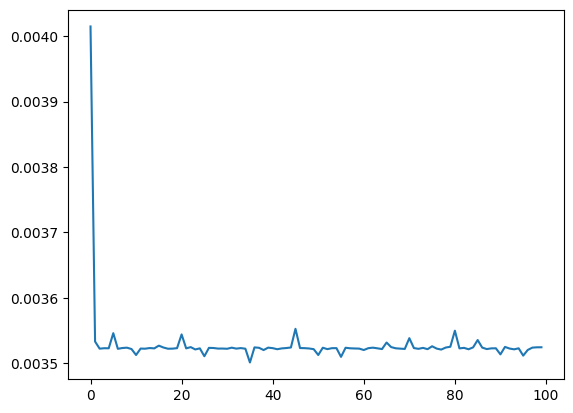

In [ ]:
acc, loss = Model_fit(model, train_loader, valid_loader, 20, optimizer, criterion, 150, device)

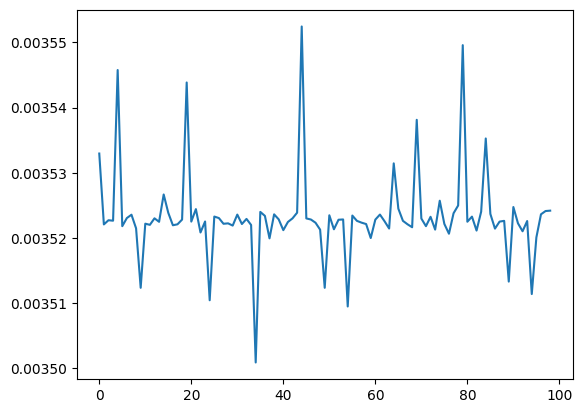

In [ ]:
plt.plot(loss[1:])

## Save model

In [ ]:
PATH_DIR = path_to_work_dir + 'My_model/'
PATH_MODEL = PATH_DIR + 'my_model_NER.pth'

In [ ]:
# if os.path.exists(PATH_DIR):
#     shutil.rmtree(PATH_DIR)
# os.makedirs(PATH_DIR)

In [ ]:
# torch.save(model, PATH_MODEL)

In [ ]:
my_model = torch.load(PATH_MODEL, map_location=torch.device('cpu'))

In [ ]:
my_model

Model_Text(
  (embedding): Embedding(76595, 2048)
  (mpool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=61, bias=True)
)

In [ ]:
test_data = torch.from_numpy(np.asanyarray(x_test)).long()
test_data = test_data.to(device)

In [ ]:
my_model = my_model.to(device)

In [ ]:
res = my_model.forward(test_data)

<ipython-input-117-6ee9ce594261>:22: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  outputs = F.softmax(out)


In [ ]:
num_res = 1588
res[num_res], test_data[num_res]

(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.], grad_fn=<SelectBackward0>),
 tensor(37066))

In [ ]:
torch.argmax(res[num_res])

tensor(51)

In [ ]:
df_words.loc[df_words['word_seq'] == int(test_data[num_res])]

,word,tag,word_seq,target_tag
65,мой,A-PRO=m,37066,3
344,мой,A-PRO=m,37066,3
591,мой,A-PRO=m,37066,3
2341,мой,A-PRO=m,37066,3
2352,мой,A-PRO=m,37066,3
...,...,...,...,...
1321172,мой,A-PRO=m,37066,3
1321962,мой,A-PRO=m,37066,3
1322039,мой,A-PRO=m,37066,3
1322047,мой,A-PRO=m,37066,3


In [ ]:
df_words.loc[df_words['word_seq'] == int(test_data[num_res]), ['word','target_tag','tag']].value_counts()

word  target_tag  tag     
мой   3           A-PRO=m     7114
      6           A-PRO=sg      41
      4           A-PRO=n       10
      10          A=f            5
      2           A-PRO=f        1
      60          V              1
Name: count, dtype: int64

# Conclusion

По результатам обучения модели, был обнаружен один недочет, который следовало проверить на этапе создания NER.

Недочет заколючается в том, что в процессе классификации и разделения слов на сущности с помощью библиотеки NLTK, некоторые одинаковые слова получили разные таги. Так например слово "мой" - имеет сразу шесть тагов, что привело к некачественному обучению модели.